In [2]:
import pandas as pd
import requests
from datetime import datetime
import random
from random import sample
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/311 Sample.csv', index_col=0, parse_dates=['Created Date','Closed Date','Due Date','Resolution Action Updated Date'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We have 100000 entries and 42 columns in this subset of the original data. Most of the columns are of type object but many of them will be dropped for the purpose of this model.

In [4]:
df.shape

(100000, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      100000 non-null  int64         
 1   Created Date                    100000 non-null  datetime64[ns]
 2   Closed Date                     97300 non-null   datetime64[ns]
 3   Agency                          100000 non-null  object        
 4   Agency Name                     100000 non-null  object        
 5   Complaint Type                  100000 non-null  object        
 6   Descriptor                      98713 non-null   object        
 7   Location Type                   75137 non-null   object        
 8   Incident Zip                    94288 non-null   object        
 9   Incident Address                81528 non-null   object        
 10  Street Name                     81522 non-null   object  

In [6]:
df.Agency.unique()

array(['NYPD', 'DCA', 'DOT', 'DPR', 'TLC', 'DOHMH', 'DOF', 'EDC', 'DSNY',
       'DFTA', 'DOE', 'DEP', 'DOB', 'HRA', 'DCAS', 'HPD', 'DHS', 'DOITT',
       'NYCEM', 'ACS', 'TAX', '3-1-1', 'OSE'], dtype=object)

In [7]:
df[df.Agency == 'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location


In [8]:
df.Agency.replace('MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT','OSE', inplace=True)

In [9]:
df['Agency Name'].unique()

array(['New York City Police Department',
       'Department of Consumer Affairs', 'Department of Transportation',
       'Department of Parks and Recreation',
       'Taxi and Limousine Commission',
       'Department of Health and Mental Hygiene', 'External Affairs Unit',
       'Economic Development Corporation', 'Payment Operations',
       'Land Records', 'Disability Rent Increase Exemption Unit',
       'BCC - Queens East', 'Department for the Aging',
       'Department of Education',
       'Department of Environmental Protection', 'BCC - Brooklyn South',
       'Brooklyn South 10', 'Queens East 10', 'P - Queens',
       'Department of Buildings', 'Department of Sanitation',
       'BCC - Queens West', 'Correspondence Unit',
       'Senior Citizen Rent Increase Exemption Unit',
       'Personal Exemption Unit', 'HRA Benefit Card Replacement',
       'HealthCare Connections', 'DCAS', 'Property Exec Office',
       'Adjudication - Hearing by Mail',
       'Department of Housing Pr

In [10]:
df['Agency Name'].replace('MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT', "Mayor's Office of Special Enforcement", inplace=True)

In [11]:
df[df['Agency Name']=='School - PS 3 The Margaret Gioiosa School']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
22511,24943255,2013-02-05 09:27:10,2014-08-11 15:12:10,DOE,School - PS 3 The Margaret Gioiosa School,School Maintenance,Heating Problem,School,10309,80 SOUTH GOFF AVENUE,SOUTH GOFF AVENUE,RIGIMAR COURT,LATOURETTE STREET,NaN,NaN,NaN,STATEN ISLAND,NaN,School,Closed,2013-02-08 09:02:49,The Department of Education completed the work...,2014-08-11 15:11:25,03 STATEN ISLAND,5.067960e+09,STATEN ISLAND,925513.0,129052.0,PHONE,School - PS 3 The Margaret Gioiosa School,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.520699,-74.211264,"(40.520698689424705, -74.2112641925322)"


In [12]:
df[df.Agency == 'DOE']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
1049,42927805,2019-06-10 14:45:48,2019-06-28 11:38:35,DOE,Department of Education,School Maintenance,Other School Condition,School,10002,100 ATTORNEY STREET,ATTORNEY STREET,RIVINGTON STREET,DELANCEY STREET,RIVINGTON STREET,DELANCEY STREET,NaN,NEW YORK,NaN,NaN,Closed,2019-06-17 14:45:48,The Department of Education completed the work...,2019-06-28 15:38:35,03 MANHATTAN,1.003430e+09,MANHATTAN,988560.0,201003.0,PHONE,School - PS 142 Amalia Castro,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718382,-73.984452,"(40.71838248220487, -73.98445190462277)"
3858,31595013,2015-09-22 21:26:30,2017-01-23 13:23:27,DOE,Central - Department of Education,School Maintenance,Other School Condition,School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,2015-09-29 21:26:30,The Department of Education reviewed the compl...,2017-01-23 13:23:27,0 Unspecified,NaN,Unspecified,NaN,NaN,PHONE,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3868,33883823,2016-07-19 14:38:09,2016-07-21 14:15:08,DOE,School - PS-MS 138 Sunrise,School Maintenance,Unclean Condition,School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,School,Closed,2016-07-26 14:38:09,The Department of Education completed the work...,2016-07-21 14:15:09,0 Unspecified,NaN,Unspecified,NaN,NaN,PHONE,School - PS-MS 138 Sunrise,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4582,33293556,2016-05-06 07:28:08,2016-05-12 14:09:09,DOE,Central - Department of Education,School Maintenance,Other School Condition,School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,2016-05-13 07:28:08,The Department of Education reviewed the compl...,2016-05-12 14:09:09,0 Unspecified,NaN,Unspecified,NaN,NaN,PHONE,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8983,16614306,2010-05-08 14:42:03,2010-05-10 14:29:14,DOE,Central - Department of Education,Discipline and Suspension,Student/Parent Rights,School,11204,6500 16 AVENUE,16 AVENUE,66 STREET,65 STREET,NaN,NaN,NaN,BROOKLYN,NaN,School District,Closed,2010-05-13 14:42:03,The Department of Education is reviewing your ...,2010-05-10 14:29:14,11 BROOKLYN,3.055510e+09,BROOKLYN,985632.0,165855.0,PHONE,School - JHS 227 Edward B Shallow,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.621910,-73.995022,"(40.62191003230527, -73.99502171451037)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95060,38165396,2018-01-09 07:28:11,2018-02-28 10:18:01,DOE,Central - Department of Education,School Maintenance,Heating Problem,School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,2018-01-12 07:28:11,The Department of Education reviewed the compl...,2018-02-28 10:18:01,0 Unspecified,NaN,Unspecified,NaN,NaN,PHONE,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95510,38553210,2018-02-26 10:44:14,2018-03-13 15:41:07,DOE,School - East Brooklyn Community High School,School Maintenance,Heating Problem,School,11212,9517 KINGS HIGHWAY,KINGS HIGHWAY,EAST 96 STREET,EAST 95 STREET,NaN,NaN,NaN,BROOKLYN,NaN,School,Closed,2018-03-01 10:44:14,The Department of Education completed the work...,2018-03-13 15:41:07,18 BROOKLYN,3.046500e+09,BROOKLYN,1006344.0,179418.0,PHONE,School - East Brooklyn Community High School,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.659110,-73.920368,"(40.65911010473921, -73.9203678796255)"
97970,40204655,2018-09-06 1

In [13]:
df['Agency Name'].value_counts().head(50)

Department of Housing Preservation and Development        26421
New York City Police Department                           24949
Department of Transportation                              13544
Department of Environmental Protection                     7789
Department of Buildings                                    5188
Department of Parks and Recreation                         4258
Department of Health and Mental Hygiene                    2553
Department of Sanitation                                   2460
Taxi and Limousine Commission                              1185
Department of Consumer Affairs                             1022
BCC - Brooklyn South                                        768
BCC - Brooklyn North                                        635
HRA Benefit Card Replacement                                493
BCC - Queens East                                           482
Operations Unit - Department of Homeless Services           478
A - Queens                              

In [14]:
df.Agency.value_counts()

HPD      26422
NYPD     24952
DOT      13544
DSNY      8527
DEP       7789
DOB       5320
DPR       4258
DOHMH     2567
DOF       2274
TLC       1211
DCA       1022
DHS        865
HRA        493
DFTA       421
3-1-1       94
DOE         88
EDC         59
NYCEM       37
DOITT       35
DCAS        11
OSE          5
ACS          5
TAX          1
Name: Agency, dtype: int64

In [15]:
df['Address Type'].value_counts()

ADDRESS         73944
INTERSECTION    14051
BLOCKFACE        2404
LATLONG           771
PLACENAME          37
Name: Address Type, dtype: int64

In [16]:
df['Status'].value_counts()

Closed         95403
Pending         2087
Open            1267
Assigned         656
In Progress      537
Started           33
Email Sent        17
Name: Status, dtype: int64

In [17]:
df['Open Data Channel Type'].value_counts()

PHONE      51183
UNKNOWN    23686
ONLINE     16511
MOBILE      7020
OTHER       1600
Name: Open Data Channel Type, dtype: int64

There are only a few ways to submit to 311 but there is a significant amount already tagged as under "unknown"

In [18]:
df['Community Board'].value_counts()

0 Unspecified       5224
12 MANHATTAN        2930
12 QUEENS           2304
03 BROOKLYN         2171
01 BROOKLYN         2150
                    ... 
95 STATEN ISLAND       3
26 BRONX               3
28 BRONX               3
27 BRONX               2
84 QUEENS              2
Name: Community Board, Length: 77, dtype: int64

In [19]:
df['Community Board'].unique()

array(['10 BRONX', '06 QUEENS', '11 MANHATTAN', '17 BROOKLYN',
       '03 QUEENS', '09 BROOKLYN', '07 MANHATTAN', '03 MANHATTAN',
       '08 BROOKLYN', '12 QUEENS', '18 BROOKLYN', '01 BROOKLYN',
       '11 QUEENS', '09 MANHATTAN', '08 BRONX', '05 QUEENS', '11 BRONX',
       '09 QUEENS', '07 QUEENS', '12 BROOKLYN', '14 BROOKLYN',
       '12 MANHATTAN', '06 BRONX', '02 STATEN ISLAND', '03 BROOKLYN',
       '15 BROOKLYN', '05 BROOKLYN', '10 QUEENS', '04 BRONX',
       '04 BROOKLYN', '10 MANHATTAN', '01 QUEENS', '0 Unspecified',
       '05 MANHATTAN', '08 MANHATTAN', '14 QUEENS', '09 BRONX',
       '01 MANHATTAN', '13 BROOKLYN', '04 MANHATTAN', '06 BROOKLYN',
       '04 QUEENS', '07 BROOKLYN', '05 BRONX', '16 BROOKLYN', '13 QUEENS',
       '02 BROOKLYN', '02 MANHATTAN', '03 STATEN ISLAND', '02 QUEENS',
       '11 BROOKLYN', '12 BRONX', '03 BRONX', '01 STATEN ISLAND',
       '01 BRONX', '02 BRONX', '08 QUEENS', '07 BRONX', '10 BROOKLYN',
       '06 MANHATTAN', '64 MANHATTAN', 'Unspecified B

In [20]:
df['Park Facility Name'].value_counts()

Unspecified                                         99337
Central Park                                           26
Riverside Park                                         16
Prospect Park                                          14
Rockaway Beach Boardwalk                               10
                                                    ...  
Fresh Kills Park                                        1
School - Manhattan Academy for Arts and Language        1
Frank Golden Park                                       1
Herbert Von King Park                                   1
Starlight Park - Jennie Jerome Playground               1
Name: Park Facility Name, Length: 433, dtype: int64

After inspecting the data since the subsetting from the original dataset, we've got to decide which of the columns will serve as features for our model.  

Columns of interest == features for the model (thus far): 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Facility Type', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location']

First, let's create a pairplot to see if there are any strong correlations between features to help in the elimiation.

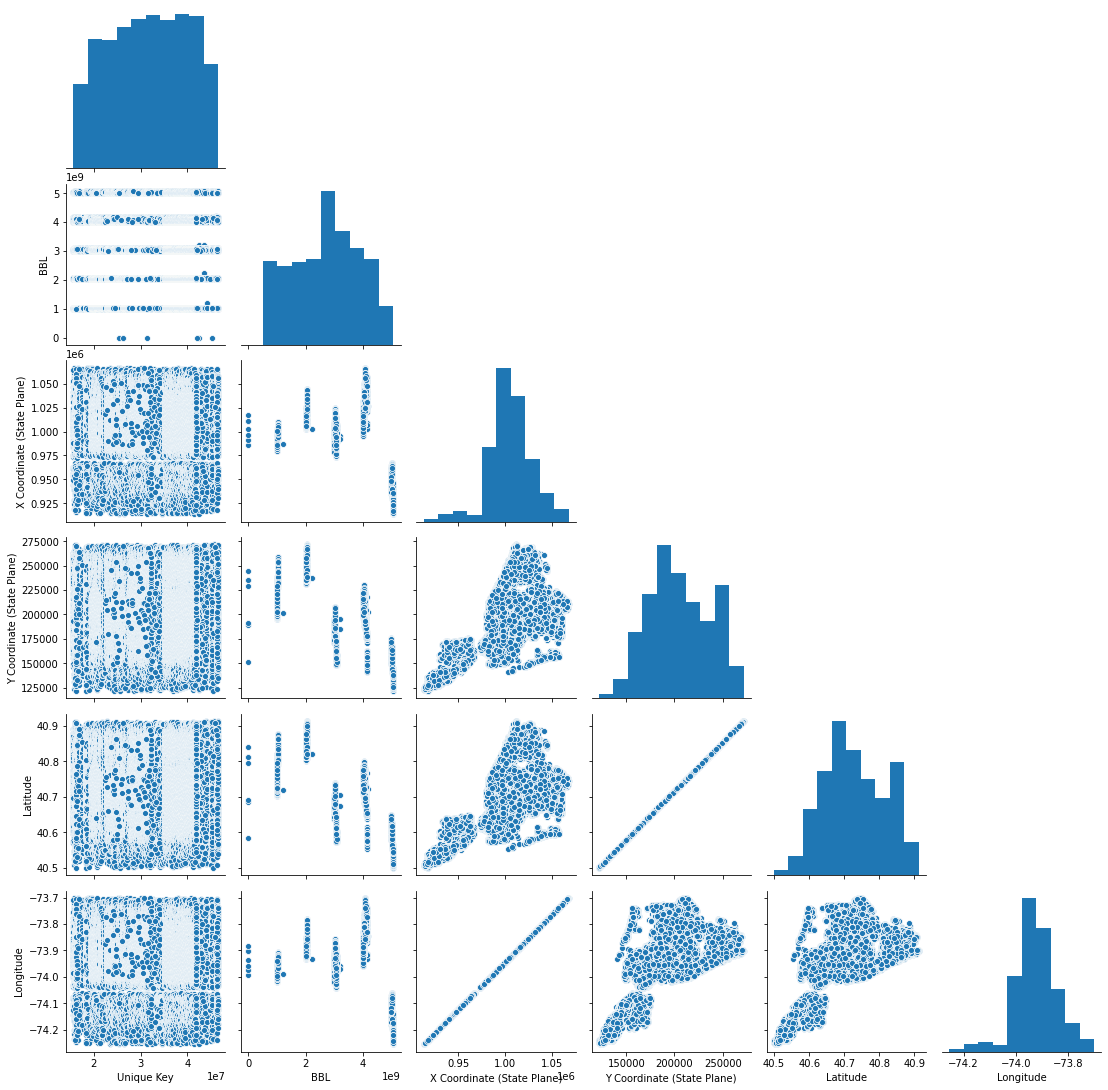

In [21]:
sns.pairplot(df, corner=True)

As expected, there is a direct correlation between X-coordinates, Y-coordinate, longitude and latitude.  Additionally, after inspection, BBL is a combination of X/Y-coordinates. So we can eliminate 2 sets of that geolocation information. 

So far the columns to be dropped will be: ['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Landmark', 'Status', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'BBL']


In [22]:
df.drop(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 
         'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Landmark', 
         'Status', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'BBL'],
        axis =1, inplace=True)
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Facility Type', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Open Data Channel Type', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [23]:
df.isnull().sum().sort_values()

Unique Key                            0
Park Borough                          0
Open Data Channel Type                0
Borough                               0
Complaint Type                        0
Community Board                       0
Created Date                          0
Agency Name                           0
Agency                                0
Park Facility Name                    8
Descriptor                         1287
Resolution Action Updated Date     1321
Resolution Description             2272
Closed Date                        2700
Incident Zip                       5712
City                               6093
Location                           8888
Longitude                          8888
Latitude                           8888
Location Type                     24863
Due Date                          62243
Facility Type                     75819
Taxi Pick Up Location             99169
Bridge Highway Segment            99758
Bridge Highway Direction          99772


We want to remove all rows that are not associated with a closed date.  This can be used later on.

In [24]:
no_close = df[df['Closed Date'].isnull()]
df = df[df['Closed Date'].notnull()]

In [25]:
df.isnull().sum().sort_values()

Unique Key                            0
Park Borough                          0
Open Data Channel Type                0
Borough                               0
Complaint Type                        0
Community Board                       0
Created Date                          0
Agency Name                           0
Closed Date                           0
Agency                                0
Park Facility Name                    8
Resolution Action Updated Date      671
Descriptor                         1264
Resolution Description             2022
Incident Zip                       5584
City                               5944
Longitude                          8729
Latitude                           8729
Location                           8729
Location Type                     24470
Due Date                          61043
Facility Type                     73133
Taxi Pick Up Location             96556
Bridge Highway Direction          97073
Road Ramp                         97075


In [26]:
unkcols = ['Park Facility Name','Incident Zip', 'City', 'Location Type', 'Facility Type', 'Taxi Company Borough',
           'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', ]
nonecols = ['Descriptor', 'Resolution Description', 'Vehicle Type', 'Taxi Pick Up Location', 'Resolution Action Updated Date', 'Due Date']

for x in unkcols:
    df[x].fillna('unknown', inplace=True)

for x in nonecols:
    df[x].fillna('none', inplace=True)

df.isnull().sum().sort_values()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Unique Key                           0
Bridge Highway Segment               0
Road Ramp                            0
Bridge Highway Direction             0
Bridge Highway Name                  0
Taxi Pick Up Location                0
Taxi Company Borough                 0
Vehicle Type                         0
Park Borough                         0
Park Facility Name                   0
Open Data Channel Type               0
Borough                              0
Resolution Action Updated Date       0
Community Board                      0
Due Date                             0
Facility Type                        0
City                                 0
Incident Zip                         0
Location Type                        0
Descriptor                           0
Complaint Type                       0
Agency Name                          0
Agency                               0
Closed Date                          0
Created Date                         0
Resolution Description   

In [27]:
df_droploc = df.dropna()

In [28]:
df_fillloc = df.fillna('unknown')

In [29]:
df_fillloc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97300 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      97300 non-null  int64         
 1   Created Date                    97300 non-null  datetime64[ns]
 2   Closed Date                     97300 non-null  datetime64[ns]
 3   Agency                          97300 non-null  object        
 4   Agency Name                     97300 non-null  object        
 5   Complaint Type                  97300 non-null  object        
 6   Descriptor                      97300 non-null  object        
 7   Location Type                   97300 non-null  object        
 8   Incident Zip                    97300 non-null  object        
 9   City                            97300 non-null  object        
 10  Facility Type                   97300 non-null  object        
 11  Du

In [30]:
df_droploc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88571 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      88571 non-null  int64         
 1   Created Date                    88571 non-null  datetime64[ns]
 2   Closed Date                     88571 non-null  datetime64[ns]
 3   Agency                          88571 non-null  object        
 4   Agency Name                     88571 non-null  object        
 5   Complaint Type                  88571 non-null  object        
 6   Descriptor                      88571 non-null  object        
 7   Location Type                   88571 non-null  object        
 8   Incident Zip                    88571 non-null  object        
 9   City                            88571 non-null  object        
 10  Facility Type                   88571 non-null  object        
 11  Du

In [31]:
df_droploc.insert(3,"Resolution Time", df['Closed Date']-df['Created Date'])
df_droploc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88571 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      88571 non-null  int64          
 1   Created Date                    88571 non-null  datetime64[ns] 
 2   Closed Date                     88571 non-null  datetime64[ns] 
 3   Resolution Time                 88571 non-null  timedelta64[ns]
 4   Agency                          88571 non-null  object         
 5   Agency Name                     88571 non-null  object         
 6   Complaint Type                  88571 non-null  object         
 7   Descriptor                      88571 non-null  object         
 8   Location Type                   88571 non-null  object         
 9   Incident Zip                    88571 non-null  object         
 10  City                            88571 non-null  object    

In [32]:
df_droploc['Resolution Time'] = df_droploc['Resolution Time'].dt.total_seconds()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_droploc['Resolution Time'].describe()

count    8.857100e+04
mean     6.250038e+05
std      5.052350e+07
min     -3.544951e+09
25%      1.078750e+04
50%      1.562020e+05
75%      6.818265e+05
max      2.802917e+08
Name: Resolution Time, dtype: float64

In [34]:
negres = df_droploc[df_droploc['Resolution Time'] < 0]
negres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 6974 to 90432
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      496 non-null    int64         
 1   Created Date                    496 non-null    datetime64[ns]
 2   Closed Date                     496 non-null    datetime64[ns]
 3   Resolution Time                 496 non-null    float64       
 4   Agency                          496 non-null    object        
 5   Agency Name                     496 non-null    object        
 6   Complaint Type                  496 non-null    object        
 7   Descriptor                      496 non-null    object        
 8   Location Type                   496 non-null    object        
 9   Incident Zip                    496 non-null    object        
 10  City                            496 non-null    object        
 11  F

In [35]:
negres.Agency.value_counts()

DOT      469
DOHMH     19
DSNY       5
DPR        2
TLC        1
Name: Agency, dtype: int64

In [36]:
df_droploc = df_droploc[df_droploc['Resolution Time'] >= 0]
df_droploc.drop(['Unique Key'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88075 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Created Date                    88075 non-null  datetime64[ns]
 1   Closed Date                     88075 non-null  datetime64[ns]
 2   Resolution Time                 88075 non-null  float64       
 3   Agency                          88075 non-null  object        
 4   Agency Name                     88075 non-null  object        
 5   Complaint Type                  88075 non-null  object        
 6   Descriptor                      88075 non-null  object        
 7   Location Type                   88075 non-null  object        
 8   Incident Zip                    88075 non-null  object        
 9   City                            88075 non-null  object        
 10  Facility Type                   88075 non-null  object        
 11  Du

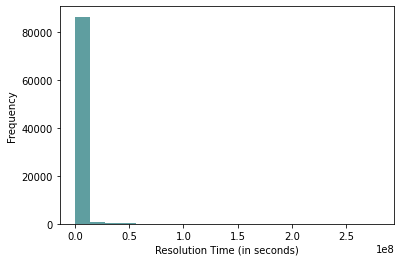

In [37]:
plt.hist((df_droploc['Resolution Time']), color = 'cadetblue', bins=20)
plt.xlabel('Resolution Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

In [38]:
sub_dfdl = df_droploc[df_droploc['Resolution Time']<30000000]
sub_dfdl.shape

(87443, 30)

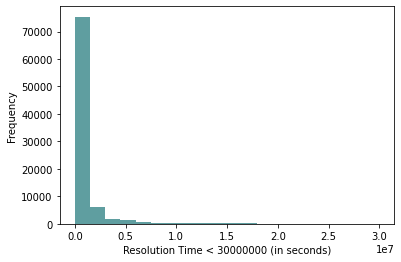

In [39]:
plt.hist((sub_dfdl['Resolution Time']), color = 'cadetblue', bins=20)
plt.xlabel('Resolution Time < 30000000 (in seconds)')
plt.ylabel('Frequency')
plt.show()

In [40]:
df_droploc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88075 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      88075 non-null  int64         
 1   Created Date                    88075 non-null  datetime64[ns]
 2   Closed Date                     88075 non-null  datetime64[ns]
 3   Resolution Time                 88075 non-null  float64       
 4   Agency                          88075 non-null  object        
 5   Agency Name                     88075 non-null  object        
 6   Complaint Type                  88075 non-null  object        
 7   Descriptor                      88075 non-null  object        
 8   Location Type                   88075 non-null  object        
 9   Incident Zip                    88075 non-null  object        
 10  City                            88075 non-null  object        
 11  Fa

In [42]:
from sklearn.model_selection import train_test_split

y = df_droploc['Resolution Time']
X = df_droploc[['Latitude','Longitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

7060251.280057869


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()